# <center >Data Science with Python 
## <center >Statistical and Data Technique in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or in the folder attached customers).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region', 'Frozen', 'Detergents_Paper', 'Delicatessen' as they will not be used 

In [41]:
import pandas as pd
import numpy as np
import statistics as sta
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Write your code from here, add more cells if needed
data = pd.read_csv("customers.csv")
print(data.head())
print(data.shape)
print(data.dtypes)
print(data.columns.tolist())
data.iloc[:,2:] = data.iloc[:,2:].astype(np.float)
print(data.dtypes)
data = data.drop(columns=['Channel', 'Region', 'Frozen', 'Detergents_Paper', 'Delicatessen'])
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
(440, 8)
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
Channel               int64
Region                int64
Fresh               float64
Milk                float64
Grocery             float64
Froz

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

Min =  3.0
Max =  92780.0
Q1 =  2153.0
Median =  4755.5
Q3 =  10655.75
Mean =  7951.277272727273
Range =  92777.0
Standard deviation  9503.162828994344
Skewness =  3.5751872200807875
Kurtosis =  20.664153228293365


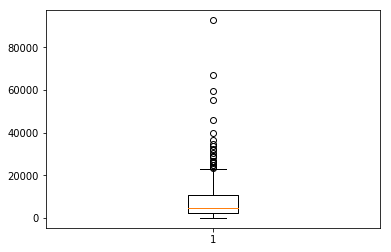

Text(0.5,1,'Annual spending on Grocery products')

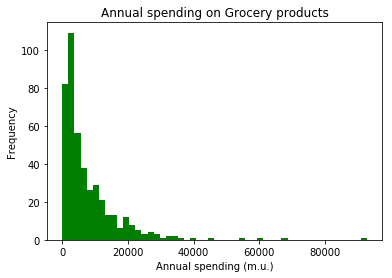

In [72]:
# Write your answer from here, add more cells if needed
print('Min = ', np.min(data['Grocery']))
print('Max = ', np.max(data['Grocery']))
print('Q1 = ', np.percentile(data['Grocery'], 25))
print('Median = ', np.median(data['Grocery']))
print('Q3 = ', np.percentile(data['Grocery'], 75))

print('Mean = ', np.mean(data['Grocery']))
print('Range = ', max(data['Grocery']) - min(data['Grocery'])) 

print('Standard deviation ', sta.stdev(data['Grocery']))
print('Skewness = ', ss.skew(data['Grocery']))
print('Kurtosis = ', ss.kurtosis(data['Grocery']))

plt.boxplot(data['Grocery'])
plt.show()

plt.hist(data['Grocery'], bins=50, facecolor='green')
plt.xlabel('Annual spending (m.u.)')
plt.ylabel('Frequency')
plt.title('Annual spending on Grocery products')

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

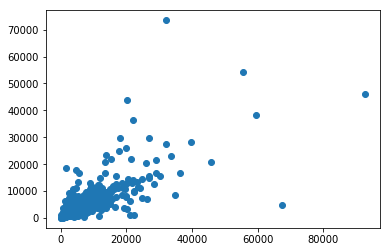

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


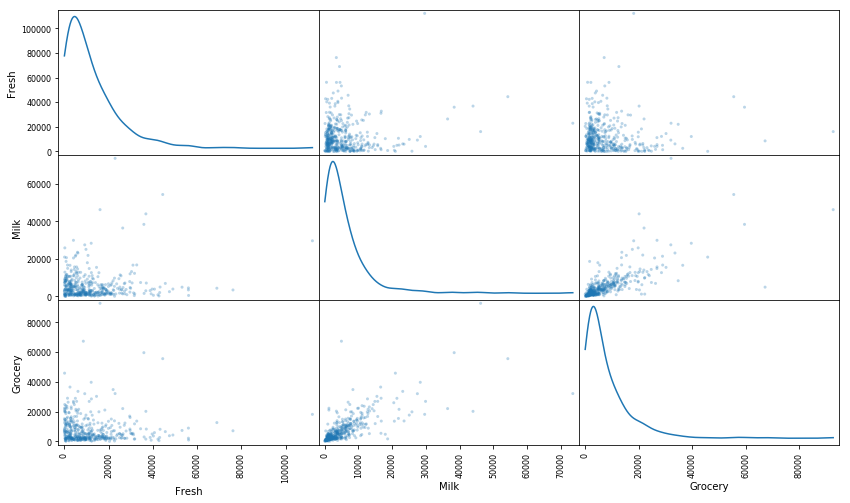

In [16]:
# Write your answer from here, add more cells if needed
np.corrcoef(data['Grocery'],data['Milk'])
plt.scatter(data['Grocery'],data['Milk'])
plt.show()
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

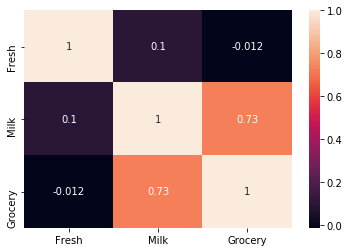

In [15]:
sns.heatmap(data.corr(), annot=True)

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [28]:
# Write your answer from here, add more cells if needed
print("p-value for non-correlation of pair Grocery and Milk:", ss.pearsonr(data['Grocery'],data['Milk'])[1])
print("p-value for non-correlation of pair Grocery and Fresh:", ss.pearsonr(data['Grocery'],data['Fresh'])[1])
print("p-value for non-correlation of pair Fresh and Milk:", ss.pearsonr(data['Fresh'],data['Milk'])[1])

p=0.1
c, pval = ss.pearsonr(data['Grocery'],data['Milk'])
print("Correlation:", c)
print("p-value for non-correlation of pair Grocery and Milk:", pval)

if p<pval:
    print("Accept H")
else:
    print("Reject H")

p-value for non-correlation of pair Grocery and Milk: 6.480570788053402e-74
p-value for non-correlation of pair Grocery and Fresh: 0.8041728013490431
p-value for non-correlation of pair Fresh and Milk: 0.03506100703784227
Correlation: 0.7283351181536448
p-value for non-correlation of pair Grocery and Milk: 6.480570788053402e-74
Reject H


### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


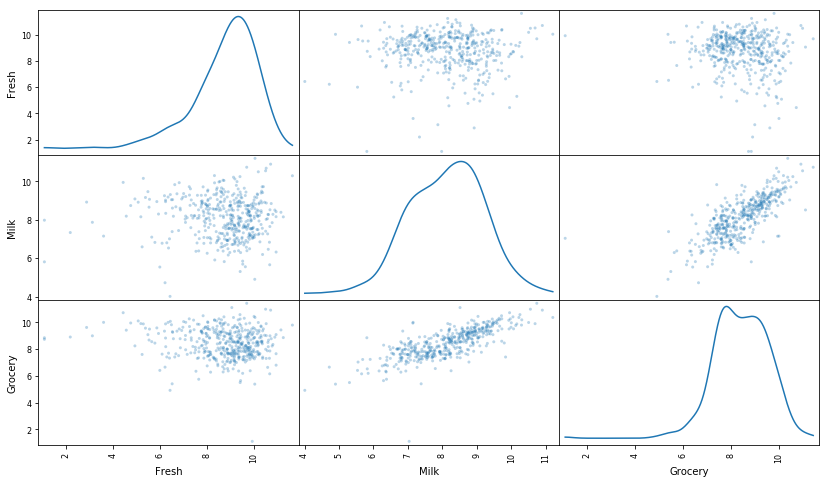

In [34]:
# Write your answer from here, add more cells if needed
log_data = np.log(data)
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Outlier step: 12754.125
Data points considered outliers for the feature 'Grocery':


Fresh     Milk  Grocery
28    4113.0  20484.0  25957.0
43     630.0  11095.0  23998.0
47   44466.0  54259.0  55571.0
49    4967.0  21412.0  28921.0
56    4098.0  29892.0  26866.0
61   35942.0  38369.0  59598.0
65      85.0  20959.0  45828.0
77   12205.0  12697.0  28540.0
85   16117.0  46197.0  92780.0
86   22925.0  73498.0  32114.0
92    9198.0  27472.0  32034.0
109   1406.0  16729.0  28986.0
145  22039.0   8384.0  34792.0
163   5531.0  15726.0  26870.0
201   4484.0  14399.0  24708.0
205   1107.0  11711.0  23596.0
211  12119.0  28326.0  39694.0
216   2532.0  16599.0  36486.0
251   6134.0  23133.0  33586.0
304    161.0   7460.0  24773.0
331  11223.0  14881.0  26839.0
333   8565.0   4980.0  67298.0
343   1689.0   6964.0  26316.0
437  14531.0  15488.0  30243.0

Outlier step: 8485.875
Data points considered outliers for the feature 'Milk':


Fresh     Milk  Grocery
23    26373.0  36423.0  22019.0
28     4113.0  20484.0  25957.0
38     4591.0  15729.0  16709.0
45     5181.0  22044.0  21531.0
47    44466.0  54259.0  55571.0
49     4967.0  21412.0  28921.0
56     4098.0  29892.0  26866.0
61    35942.0  38369.0  59598.0
65       85.0  20959.0  45828.0
85    16117.0  46197.0  92780.0
86    22925.0  73498.0  32114.0
92     9198.0  27472.0  32034.0
109    1406.0  16729.0  28986.0
163    5531.0  15726.0  26870.0
171     200.0  25862.0  19816.0
181  112151.0  29627.0  18148.0
183   36847.0  43950.0  20170.0
211   12119.0  28326.0  39694.0
216    2532.0  16599.0  36486.0
251    6134.0  23133.0  33586.0
254   10379.0  17972.0   4748.0
265    5909.0  23527.0  13699.0
309     918.0  20655.0  13567.0
319    9759.0  25071.0  17645.0
325   32717.0  16784.0  13626.0
358     759.0  18664.0   1660.0
384   10683.0  21858.0  15400.0
427   31012.0  16687.0   5429.0

Outlier step: 20709.0
Data points considered outliers for the feature 'Fresh':


Fresh     Milk  Grocery
29    43088.0   2100.0   2609.0
39    56159.0    555.0    902.0
47    44466.0  54259.0  55571.0
52    40721.0   3916.0   5876.0
87    43265.0   5025.0   8117.0
103   56082.0   3504.0   8906.0
125   76237.0   3473.0   7102.0
129   42312.0    926.0   1510.0
176   45640.0   6958.0   6536.0
181  112151.0  29627.0  18148.0
239   47493.0   2567.0   3779.0
258   56083.0   4563.0   2124.0
259   53205.0   4959.0   7336.0
282   49063.0   3965.0   4252.0
284   68951.0   4411.0  12609.0
285   40254.0    640.0   3600.0
289   42786.0    286.0    471.0
370   39679.0   3944.0   4955.0
377   38793.0   3154.0   2648.0
436   39228.0   1431.0    764.0

[28, 43, 47, 49, 56, 61, 65, 77, 85, 86, 92, 109, 145, 163, 201, 205, 211, 216, 251, 304, 331, 333, 343, 437, 23, 28, 38, 45, 47, 49, 56, 61, 65, 85, 86, 92, 109, 163, 171, 181, 183, 211, 216, 251, 254, 265, 309, 319, 325, 358, 384, 427, 29, 39, 47, 52, 87, 103, 125, 129, 176, 181, 239, 258, 259, 282, 284, 285, 289, 370, 377, 436]
Number of outliers (inc duplicates):  72
New dataset with removed outliers has 384 samples with 3 features each.


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


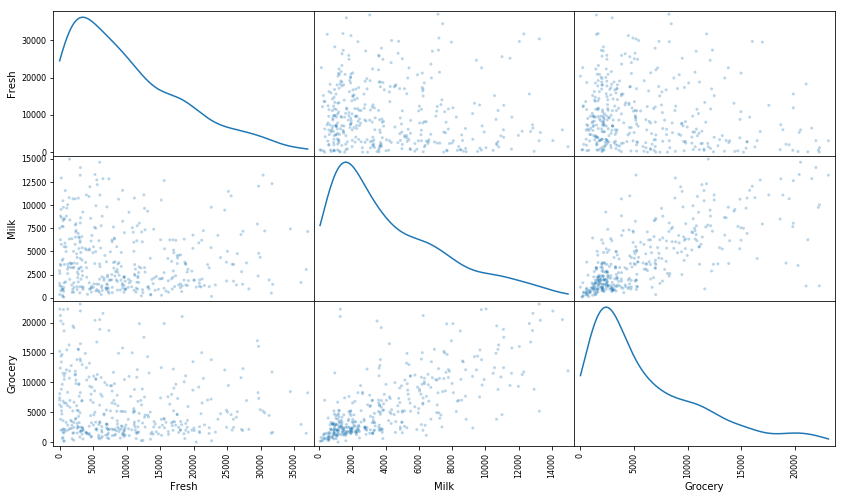

In [40]:
outliers=[]

# For each feature find the data points with extreme high or low values
for feature in 'Grocery', 'Milk', 'Fresh':
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist()
    
# Remove the outliers, if any were specified
print(outliers)
good_log_data = data.drop(data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_log_data.shape))
pd.scatter_matrix(good_log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [51]:
# Write your answer from here, add more cells if needed
# one-sample-t-test
# For log_data
z=log_data['Fresh']
print(np.mean(z))
t=(np.mean(z)-8.8)*math.sqrt(len(z))/sta.stdev(z)
print(t)

8.730544041198172
-0.9843582884849971


In [47]:
ss.ttest_1samp(log_data['Fresh'], 8.73)

Ttest_1sampResult(statistic=0.007710374630638866, pvalue=0.9938515745936873)

In [59]:
p = 0.05
c, pvalue = ss.ttest_1samp(log_data['Fresh'], 8.73)
print(pvalue)
if p < pvalue:
    print("Accept H")
else:
    print("Reject H")

0.9938515745936873
Accept H


In [62]:
#For good_log_data
z=good_log_data['Fresh']
print(np.mean(z))
t=(np.mean(z)-8.8)*math.sqrt(len(z))/sta.stdev(z)
print(t)

10071.213541666666
23.37846409912071


In [63]:
ss.ttest_1samp(good_log_data['Fresh'], 10071.21)

Ttest_1sampResult(statistic=8.228515622131946e-06, pvalue=0.9999934388785364)

In [64]:
p = 0.05
c, pvalue = ss.ttest_1samp(log_data['Fresh'], 8.73)
print(pvalue)
if p < pvalue:
    print("Accept H")
else:
    print("Reject H")

0.9938515745936873
Accept H


In [65]:
# two-sample-t-test

In [69]:
p = 0.05
c, pvalue = ss.ttest_ind(log_data['Fresh'],good_log_data['Fresh'])
print(pvalue)
if p < pvalue:
    print("Accept H")
else:
    print("Reject H")

3.277659602241493e-103
Reject H


In [70]:
p = 0.05
c, pvalue = ss.ttest_ind(log_data['Milk'],good_log_data['Milk'])
print(pvalue)
if p < pvalue:
    print("Accept H")
else:
    print("Reject H")

1.0856577967183823e-108
Reject H
